# Relatório de analise 7

## Criando agrupamentos

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [3]:
dados.Bairro.unique()

array(['Copacabana', 'Jardim Botânico', 'Centro', 'Higienópolis',
       'Cachambi', 'Barra da Tijuca', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Taquara', 'Freguesia (Jacarepaguá)',
       'Tijuca', 'Olaria', 'Ipanema', 'Campo Grande', 'Botafogo',
       'Recreio dos Bandeirantes', 'Leblon', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'São Conrado', 'Vila Valqueire', 'Gávea', 'Cosme Velho',
       'Bonsucesso', 'Todos os Santos', 'Laranjeiras', 'Itanhangá',
       'Flamengo', 'Piedade', 'Lagoa', 'Catete', 'Jardim Carioca',
       'Benfica', 'Glória', 'Praça Seca', 'Vila Isabel', 'Engenho Novo',
       'Engenho de Dentro', 'Pilares', 'Água Santa', 'São Cristóvão',
       'Ilha do Governador', 'Jardim Sulacap', 'Oswaldo Cruz',
       'Vila da Penha', 'Anil', 'Vargem Grande', 'Tanque', 'Vaz Lobo',
       'Madureira', 'São Francisco Xavier', 'Pechincha', 'Leme', 'Irajá',
       'Quintino Bocaiúva', 'Urca', 'Penha',

In [4]:
dados.Bairro.value_counts()

Barra da Tijuca             3863
Copacabana                  2644
Ipanema                     1764
Recreio dos Bandeirantes    1649
Leblon                      1258
                            ... 
Cidade Jardim                  1
Caju                           1
Cachamorra                     1
Senador Camará                 1
Rio da Prata                   1
Name: Bairro, Length: 152, dtype: int64

In [5]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [6]:
dados['Valor'].mean()

5046.172821405663

In [7]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [8]:
dados.Bairro.unique()

array(['Copacabana', 'Barra da Tijuca', 'Tijuca', 'Ipanema', 'Botafogo',
       'Leblon', 'Flamengo'], dtype=object)

In [9]:
dados.Bairro.value_counts()

Barra da Tijuca    3863
Copacabana         2644
Ipanema            1764
Leblon             1258
Tijuca             1100
Botafogo            873
Flamengo            714
Name: Bairro, dtype: int64

In [10]:
grupo_bairro = dados.groupby('Bairro')

In [11]:
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    5,    14,    16,    21,    30,    32,    35,    42,    43,
                60,
             ...
             21769, 21771, 21774, 21782, 21800, 21801, 21811, 21812, 21813,
             21820],
            dtype='int64', length=3863),
 'Botafogo': Int64Index([   23,    48,    87,    88,   111,   119,   127,   134,   196,
               200,
             ...
             21471, 21487, 21499, 21529, 21653, 21660, 21666, 21715, 21746,
             21790],
            dtype='int64', length=873),
 'Copacabana': Int64Index([    0,     9,    10,    11,    24,    25,    28,    31,    86,
                91,
             ...
             21707, 21713, 21736, 21743, 21780, 21783, 21795, 21809, 21810,
             21815],
            dtype='int64', length=2644),
 'Flamengo': Int64Index([   78,   138,   218,   284,   321,   347,   356,   361,   369,
               393,
             ...
             21527, 21560, 21581, 21629, 21680, 21704, 21728, 21731, 21740,
  

In [12]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data['Valor'].mean()))

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Copacabana -> 4126.677004538578
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [13]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


# Estatistica Descritiva

In [14]:
# Frequencia = Count, Mean = Media, Desvio padrao = std, valor minimo = min, primeiro quartio = 25%, mediana = 50%
# Terceiro Quartio = 75%, valor maximo = max
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [15]:
# podemos selecionar tambem valores que nos interessam separadamente.
grupo_bairro['Valor'].aggregate(['min','max']).rename(columns = {'min':'Minimo', 'max':'Maximo'})

,Minimo,Maximo
Bairro,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure',figsize = (20,10))

Text(0.5, 1.0, 'Valor medio do aluguel por Bairro')

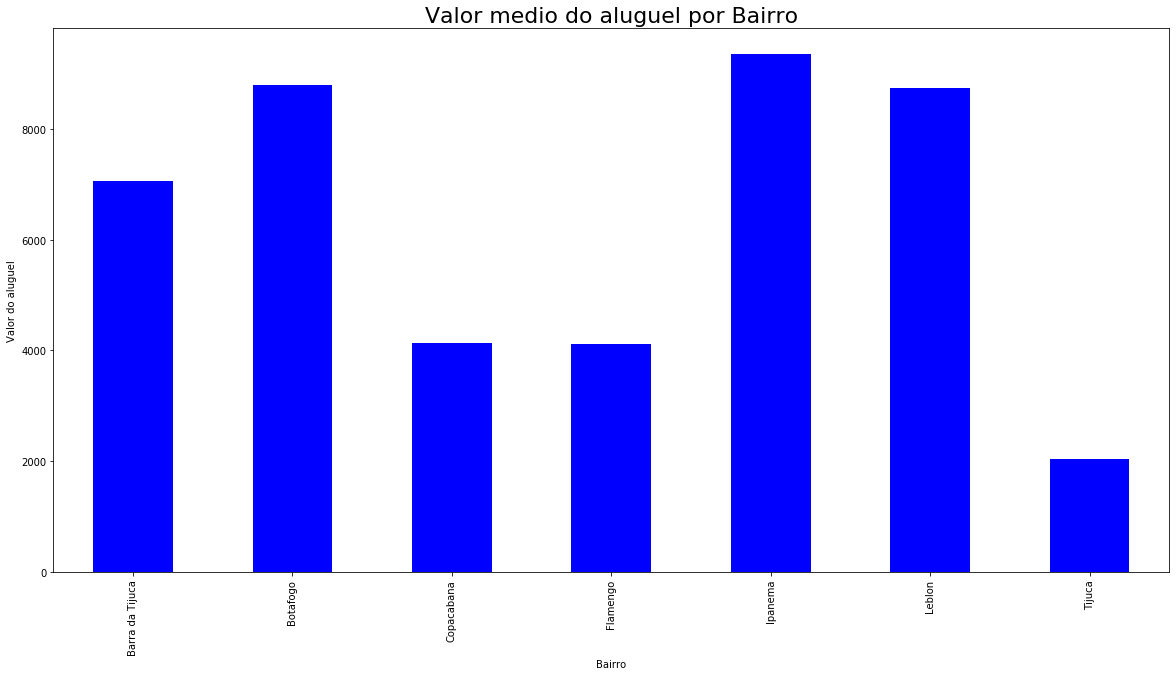

In [17]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do aluguel')
fig.set_title('Valor medio do aluguel por Bairro',{'fontsize':22})

### Analise de aluguel por bairro (bairros com maiores frequencias)

In [18]:
dados2 = pd.read_csv('dados/aluguel_residencial.csv',sep=';')
bairros2 = ['Barra da Tijuca', 'Copacabana', 'Recreio dos Bandeirantes', 'Leblon']
selecao2 = dados2['Bairro'].isin(bairros2)
dados2 = dados2[selecao2]

In [19]:
# sabemos que nossa importação segue correta para verificar os bairros com maiores frequencias.
dados2['Bairro'].unique()

array(['Copacabana', 'Barra da Tijuca', 'Recreio dos Bandeirantes',
       'Leblon'], dtype=object)

In [20]:
# Com isso vemos a quantia de entradas dos bairros
dados2['Bairro'].value_counts()

Barra da Tijuca             3863
Copacabana                  2644
Recreio dos Bandeirantes    1649
Leblon                      1258
Name: Bairro, dtype: int64

In [21]:
# com isso conseguimos ver a analise descritiva das residencias nos bairros mencionados.
agrupamento = dados2.groupby('Bairro')
agrupamento['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Recreio dos Bandeirantes,1649.0,3736.61,30797.79,900.0,1800.0,2300.0,3200.0,1250000.0


In [22]:
# mas nossa intenção é encontrar os alugueis mais baratos. Entao vamos fazer esta seleção
# vamos verificar a base de dados2 para alugueis menores ou iguais a 1500
alugueis = dados2['Valor'] <= 1500
alugueis.value_counts()

False    8681
True      733
Name: Valor, dtype: int64

In [23]:
# com os dados acima, sabemos que 733 dos resultados são verdadeiros para essa seleção
# abaixo iremos visualizar quantas entradas existem para cada tipo de valor
selecao2 = dados2['Valor'] <= 1500
n1 = dados2[selecao2]
n1.Valor.value_counts()

1500.0    257
1300.0    108
1400.0    101
1200.0     78
1100.0     45
1000.0     41
1350.0     13
1450.0     12
1150.0     12
1250.0     11
900.0      10
800.0       8
950.0       8
700.0       5
850.0       2
1050.0      2
100.0       2
1190.0      1
910.0       1
1280.0      1
1080.0      1
1290.0      1
930.0       1
790.0       1
1490.0      1
1499.0      1
1130.0      1
750.0       1
1480.0      1
1230.0      1
1070.0      1
1380.0      1
1180.0      1
1140.0      1
1390.0      1
Name: Valor, dtype: int64

Text(0.5, 1.0, 'Valor do aluguel')

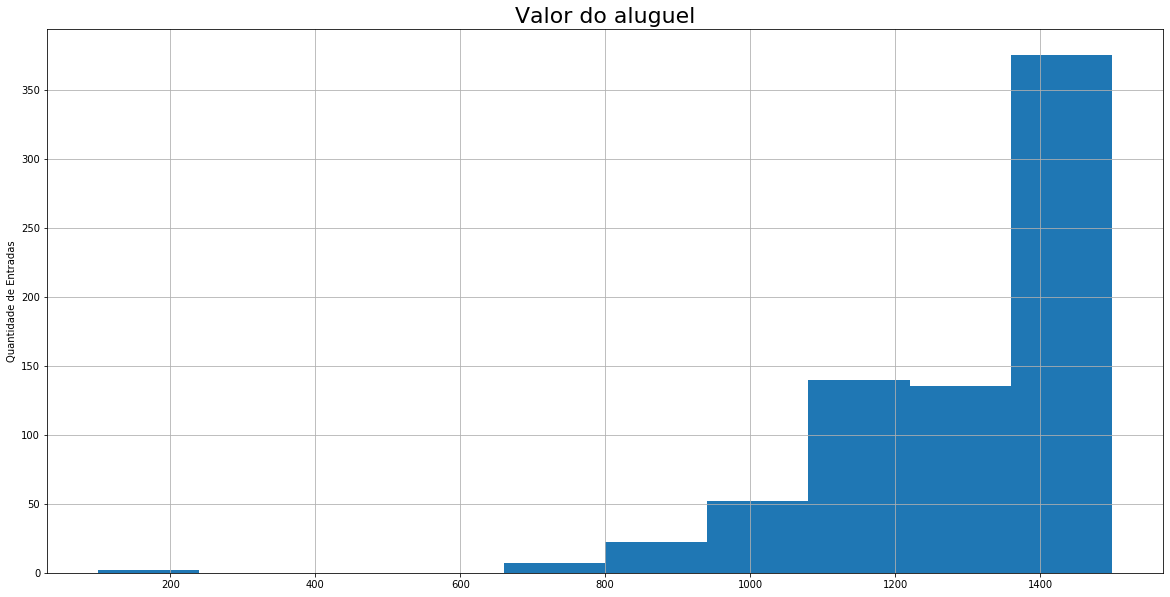

In [24]:
# abaixo vemos em uma forma grafica a distribuição dos valores
fig = n1['Valor'].hist()
fig.set_ylabel('Quantidade de Entradas')
fig.set_title('Valor do aluguel',{'fontsize':22})

In [25]:
# verificamos de forma grafica, a quantia de entradas dos valores. 
# a intencao agora é verificar quantas vezes os valores aparecem nos bairros mencionados.
res = n1['Valor'].groupby(n1.Bairro)
res.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,184.0,1339.89,165.87,800.0,1200.0,1400.0,1500.0,1500.0
Copacabana,373.0,1265.60,211.20,100.0,1100.0,1300.0,1480.0,1500.0
Leblon,4.0,1137.50,692.07,100.0,1112.5,1475.0,1500.0,1500.0
Recreio dos Bandeirantes,172.0,1409.59,135.54,900.0,1375.0,1500.0,1500.0,1500.0


In [26]:
import seaborn as sns

In [27]:
sns.set(style="ticks")

In [28]:
res2= n1.loc[1:][['Bairro','Valor']]
res2.index = range(res2.shape[0])

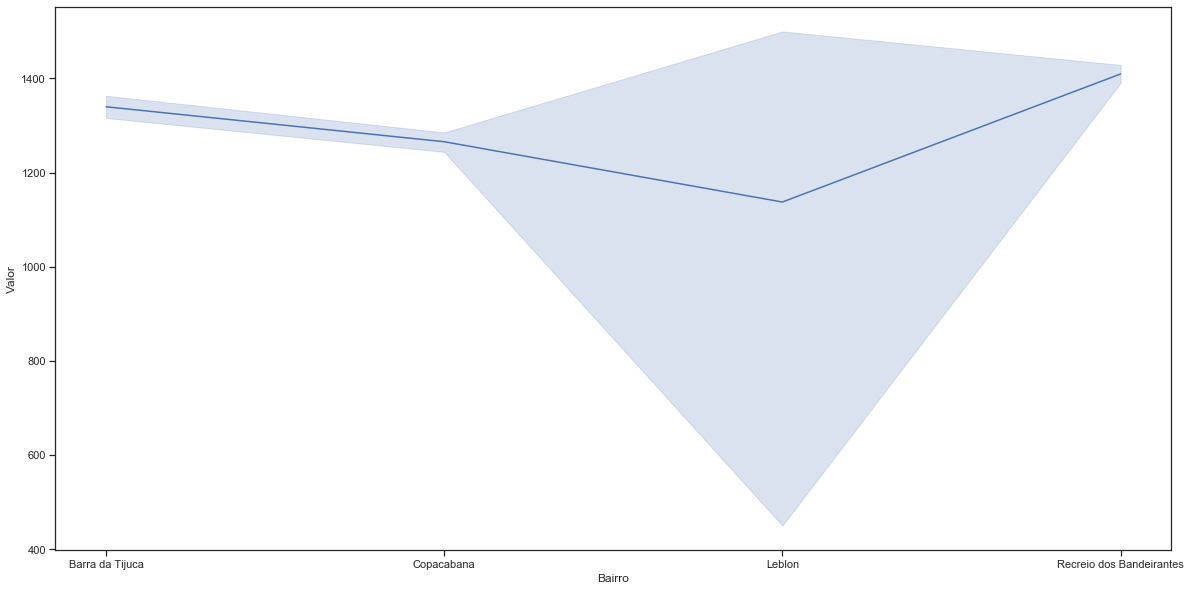

In [29]:
# esse eu mantive apenas porquê ficou parecendo uma pipa
sns.lineplot(data=res2 , x='Bairro',y='Valor')

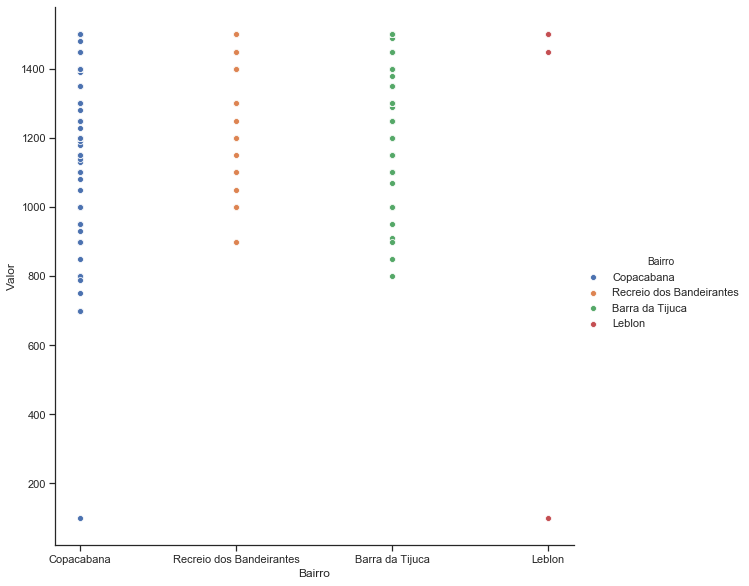

In [31]:
sns.pairplot(x_vars='Bairro', y_vars='Valor', data=res2, height=8, hue="Bairro")

[]

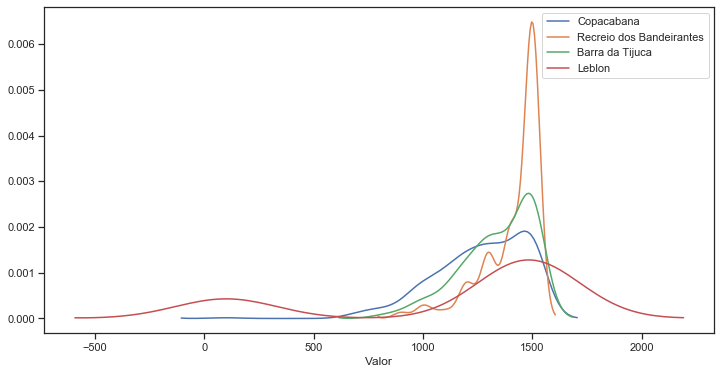

In [39]:
plt.figure(figsize=(12, 6))
for i in res2['Bairro'].unique():
    sns.distplot(res2[res2['Bairro'] == i]['Valor'], hist=False, rug=False, label = i)
plt.plot()